In [1]:
from utils import dataframeUtil
import Configurations as config
from utils import modelUtils
from simulation import simulationProfile as profiles

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import joblib
from models import mean_threshold_model as mmt_model
from models import models_builder
mmt_model.dir=""

Configuration report:
Number of Subgroups is: 7
The Trend Simulation Formel is: x*1.3+10
randomshift ist: False
shift-value= 0.5  and  3.0
main dir: ../


In [16]:
#models_builder.createModels_for_classification()
#suffix ="classification"
#models_builder.dnn_model(models_builder.get_ddn_layers(),suffix)
#models_builder.createModels_for_7x_m13_randShift()
#models_builder.createModels_for_7x_m08_randShift()
#models_builder.createModels_for_7x_m04_randShift()

n= 7 trend_optimize= True randomShift= True
exportSuffix= 7x_m13_randShift/
number of Target Variable is 5
Epoch 1/30
313/313 [==============================] - 1s 1ms/step - loss: 0.1742 - accuracy: 0.8490 - val_loss: 0.0768 - val_accuracy: 0.9424
Epoch 2/30
313/313 [==============================] - 0s 912us/step - loss: 0.0614 - accuracy: 0.9458 - val_loss: 0.0509 - val_accuracy: 0.9588
Epoch 3/30
313/313 [==============================] - 0s 1ms/step - loss: 0.0439 - accuracy: 0.9618 - val_loss: 0.0404 - val_accuracy: 0.9688
Epoch 4/30
313/313 [==============================] - 1s 2ms/step - loss: 0.0360 - accuracy: 0.9684 - val_loss: 0.0320 - val_accuracy: 0.9768
Epoch 5/30
313/313 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9724 - val_loss: 0.0284 - val_accuracy: 0.9772
Epoch 6/30
313/313 [==============================] - 0s 1ms/step - loss: 0.0278 - accuracy: 0.9736 - val_loss: 0.0300 - val_accuracy: 0.9740
Epoch 7/30
313/313 [===================

-1.8068855202304026 1.7693335352224506


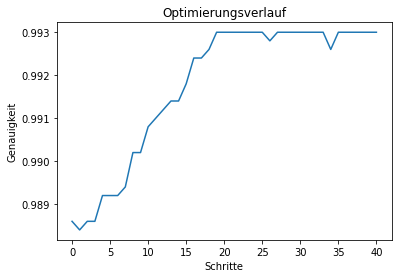

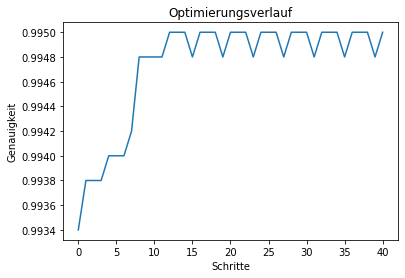

-1.6568855202304025 1.5593335352224504
done ...


In [4]:
# for Classification with 7 points

# Import Dataset
x_test,y_test = dataframeUtil.getDataset(config.testDatasetName,config.neuralInputsNumber,config.numberOftargetVariables)
# load models
suffix ="classification"
dnn_model=keras.models.load_model(config.model_output_path+suffix+'/dnn_model_'+suffix+'.h5')
rf_model = joblib.load(config.model_output_path+suffix+'/random_forest_'+suffix+'.joblib')
svm_model = joblib.load(open(config.model_output_path+suffix+'/svm_model_'+suffix+'.sav', 'rb'))
mmt_model.trainModel(config.neuralInputsNumber)
# do prediction
y_dnn_pred=dnn_model.predict(x_test)
y_rf_pred=rf_model.predict(x_test)
y_svm_pred=modelUtils.transform_y_to_binary(svm_model.predict(x_test))
y_mmt_pred = mmt_model.predict(x_test)
suffix=""
push=0
path="scores/7points"

n= 7 trend_optimize= True randomShift= True
exportSuffix= 7x_m04_randShift/
-2.668241246018257 3.001729376786041


C:\Users\Kal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: Unde

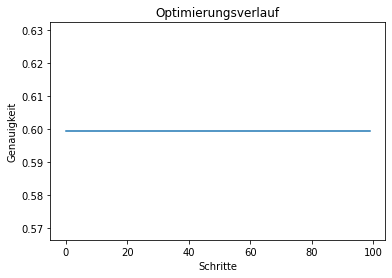

C:\Users\Kal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: Unde

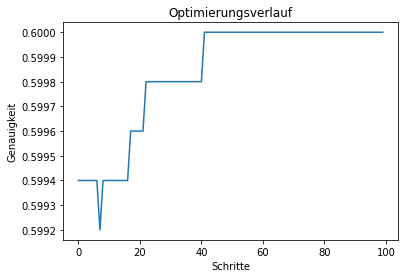

-3.508241246018239 4.00172937678602
done ...


In [2]:
#profiles
#suffix = profiles.setProfile_7x_m13_randShift()[:-1]
#suffix = profiles.setProfile_7x_m08_randShift()[:-1]
suffix = profiles.setProfile_7x_m04_randShift()[:-1]
# Import Dataset
x_test,y_test = dataframeUtil.getDataset(config.testDatasetName,config.neuralInputsNumber,config.numberOftargetVariables)
dnn_model=keras.models.load_model(config.model_output_path+suffix+'/dnn_model_'+suffix+'.h5')
rf_model = joblib.load(config.model_output_path+suffix+'/random_forest_'+suffix+'.joblib')
svm_model = joblib.load(open(config.model_output_path+suffix+'/svm_model_'+suffix+'.sav', 'rb'))
mmt_model.epoch=100
mmt_model.trainModel(config.neuralInputsNumber)
# do prediction
y_dnn_pred=dnn_model.predict(x_test)
y_rf_pred=rf_model.predict(x_test)
y_svm_pred=modelUtils.transform_y_to_binary(svm_model.predict(x_test))
y_mmt_pred = mmt_model.predict(x_test)
#suffix=""
push=0
path="scores/"+suffix


In [6]:
# for Classification with 4*7 points
from simulation import quadraticTrend
# Import Dataset
suffix = config.model_suffix_classification_quadraticTrend
x_test,y_test = dataframeUtil.getDataset(config.testDatasetNameQuadratic,config.neuralInputsNumber,config.numberOftargetVariables)
# load models
dnn_model=keras.models.load_model(config.model_output_path+suffix+'/dnn_model_'+suffix+'.h5')
rf_model = joblib.load(config.model_output_path+suffix+'/random_forest_'+suffix+'.joblib')
svm_model = joblib.load(open(config.model_output_path+suffix+'/svm_model_'+suffix+'.sav', 'rb'))
mmt_model.trainModel(config.neuralInputsNumber)
# do prediction
y_dnn_pred=dnn_model.predict(x_test)
y_rf_pred=rf_model.predict(x_test)
y_svm_pred=modelUtils.transform_y_to_binary(svm_model.predict(x_test))
y_mmt_pred = mmt_model.predict(x_test)
#suffix=""
push=0
path="scores/qudratic"

-4.227851167265994 4.166260320358785
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindat

getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quadratic/traindata.csv
getting data form: dataset/Quad

-4.1178511672659965 4.576260320358776
done ...


In [4]:
# for Predection with 4 points

# Import Dataset
DataPoinstsNumber = 4
x_test,y_test = dataframeUtil.getDataset(config.testDatasetName,config.neuralInputsNumber,config.numberOftargetVariables)
x_test = x_test[:,0:DataPoinstsNumber]
neuralInputsNumber = DataPoinstsNumber
targetVarNumber = config.numberOftargetVariables
# load models
suffix ="prediction"
dnn_model=keras.models.load_model(config.model_output_path+suffix+'/dnn_model_'+suffix)
rf_model = joblib.load(config.model_output_path+suffix+'/random_forest_'+suffix+'.joblib')
svm_model = joblib.load(open(config.model_output_path+suffix+'/svm_model_'+suffix+'.sav', 'rb'))
# prediction
y_dnn_pred=dnn_model.predict(x_test)
y_rf_pred=rf_model.predict(x_test)
y_svm_pred=modelUtils.transform_y_to_binary(svm_model.predict(x_test))
y_mmt_pred = mmt_model.predict(x_test)
suffix="Pred_"
push=0.1
path="scores/4points"

In [3]:
def getConfusionMatix(y_pred, y_test, path,modelName):
    accurancy, confusionMatrix, report = modelUtils.getMetric(y_pred, y_test)
    cm = np.asanyarray(confusionMatrix)
    df = pd.DataFrame(cm, columns=config.labels)
    df.index = config.labels
    print(path+"/confusionMatrix_"+modelName+".xls")
    df.to_excel(path+"/confusionMatrix_"+modelName+".xls")
    return df

def getConfusionMatix_multy_classes(y_pred, y_test,path, modelName):
    FP, FN, TP, TN = modelUtils.get_fb_fn_tp_tn(y_pred, y_test)
    dic = {
        "FP": FP, "FN": FN, "TP": TP, "TN": TN
    }
    df = pd.DataFrame(dic)
    df.index = config.labels
    precision, recall, fscore, accuracy = modelUtils.calculateScores(
        y_pred, y_test)
    df["Precision"] = precision
    df["Recall"] = recall
    df["FScore"] = fscore
    df["Accuracy"] = accuracy
    df.loc['Average'] = df.mean()
    print(path+"/confusionMatrix_Multy_"+modelName+".xls")
    df.to_excel(path+"/confusionMatrix_Multy_"+modelName+".xls")
   
    return df


In [4]:

def exportConfusionMatix():
    df = getConfusionMatix(y_dnn_pred,y_test,path,suffix+"_dnn_model")
    df = getConfusionMatix(y_rf_pred,y_test,path,suffix+"_rf_model")
    df = getConfusionMatix(y_svm_pred,y_test,path,suffix+"_svm_model")
    df = getConfusionMatix(y_mmt_pred,y_test,path,suffix+"_mmt_model")
def exportConfusionMatix_multy_classes():
    df = getConfusionMatix_multy_classes(y_dnn_pred,y_test,path,suffix+"_dnn_model")
    df = getConfusionMatix_multy_classes(y_rf_pred,y_test,path,suffix+"_rf_model")
    df = getConfusionMatix_multy_classes(y_svm_pred,y_test,path,suffix+"_svm_model")
    df = getConfusionMatix_multy_classes(y_mmt_pred,y_test,path,suffix+"_mmt_model")

exportConfusionMatix()
exportConfusionMatix_multy_classes()

scores/7x_m04_randShift/confusionMatrix_7x_m04_randShift_dnn_model.xls


C:\Users\Kal\AppData\Local\Temp\ipykernel_24084\3226093743.py:7: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(path+"/confusionMatrix_"+modelName+".xls")
C:\Users\Kal\AppData\Local\Temp\ipykernel_24084\3226093743.py:7: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will al

scores/7x_m04_randShift/confusionMatrix_7x_m04_randShift_rf_model.xls
scores/7x_m04_randShift/confusionMatrix_7x_m04_randShift_svm_model.xls
scores/7x_m04_randShift/confusionMatrix_7x_m04_randShift_mmt_model.xls
scores/7x_m04_randShift/confusionMatrix_Multy_7x_m04_randShift_dnn_model.xls
scores/7x_m04_randShift/confusionMatrix_Multy_7x_m04_randShift_rf_model.xls
scores/7x_m04_randShift/confusionMatrix_Multy_7x_m04_randShift_svm_model.xls
scores/7x_m04_randShift/confusionMatrix_Multy_7x_m04_randShift_mmt_model.xls


C:\Users\Kal\AppData\Local\Temp\ipykernel_24084\3226093743.py:25: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(path+"/confusionMatrix_Multy_"+modelName+".xls")


In [8]:
#wrongClassificationsCharts,shouldClassifications= modelUtils.getFalseClassifications(dnn_model,x_test,y_test)
#table,table_with_count_of_duplicated,grouped_table,summarized_tabel = modelUtils.getFalseClassificationsReport(dnn_model,wrongClassificationsCharts,shouldClassifications)
#grouped_table

In [5]:
#score
# p_macro, r_macro, f_macro , accurancy #rf_model_score=(0.1, 0.993, 0.9930000223516341, 0.5)
dnn_model_score =modelUtils.getMeanScores(y_dnn_pred,y_test)
rf_model_score =modelUtils.getMeanScores(y_rf_pred,y_test)
svm_model_score =modelUtils.getMeanScores(y_svm_pred,y_test)
mmt_model_score =modelUtils.getMeanScores(y_mmt_pred,y_test)


C:\Users\Kal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Kal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1318: Unde

In [6]:
score = {
    "Score_Type":["Precision", "Recall", "FScore", "Accurancy"],
    "DNN_Model":dnn_model_score,
    "RF_Model":rf_model_score,
    "SVM_Model":svm_model_score,
    "MMD_Model":mmt_model_score,
}
df = pd.DataFrame(score)
exportPath="scores/"+suffix+"/"+suffix+"_score.xls"
print(exportPath)
df.to_excel(exportPath, index=False)
df.head()

scores/7x_m04_randShift/7x_m04_randShift_score.xls


C:\Users\Kal\AppData\Local\Temp\ipykernel_24084\1467441245.py:11: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel(exportPath, index=False)


Score_Type  DNN_Model  RF_Model  SVM_Model  MMD_Model
0  Precision   0.797016  0.798660   0.793752        NaN
1     Recall   0.766600  0.765200   0.764000       0.60
2     FScore   0.752648  0.749018   0.752721        NaN
3  Accurancy   0.906640  0.906080   0.905600       0.84

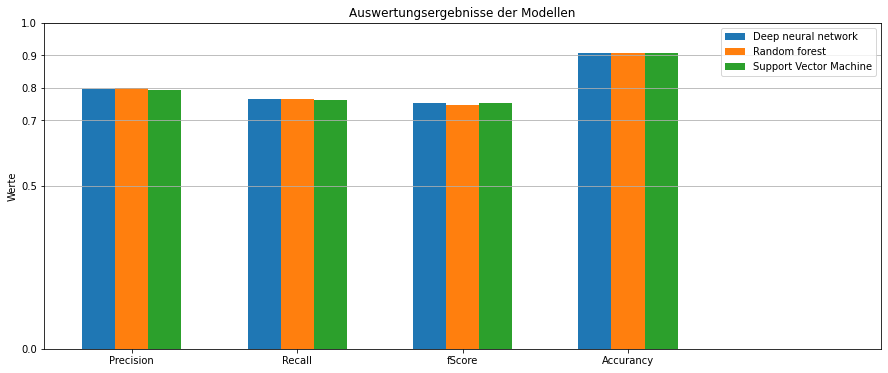

In [14]:
push=0.1
index = np.arange(4)
bar_width = 0.2
fig, ax = plt.subplots(figsize=(15, 6),sharex=True)
ax.bar(index-bar_width+push, dnn_model_score, bar_width,label="Deep neural network")
ax.bar(index+push, rf_model_score,bar_width, label="Random forest")
ax.bar(index+1*bar_width+push, svm_model_score,bar_width, label="Support Vector Machine")
if(push == 0):
 ax.bar(index+2*bar_width+push, mmt_model_score,bar_width, label="mean thershold")
ax.bar(index+6*bar_width+push, 0,bar_width)
#ax.set_xlabel('Bewertungstyp')
ax.set_ylabel('Werte')
ax.set_title('Auswertungsergebnisse der Modellen')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Precision", "Recall", "fScore", "Accurancy"])
ax.legend()
plt.grid(axis = 'y')
xmarks=[0.0,0.5,0.97,1.0]
if(push != 0):
    xmarks=[0.0,0.5,0.7,0.8,0.9,1.0]
#xmarks=[0.0,0.5,0.70,0.80,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0]
plt.yticks(xmarks)
#ax.tick_params(axis='y', which='major', labelsize=7)
#ax.tick_params(axis='y', which='minor', labelsize=6)
#plt.yticks(fontsize=7.2, rotation=40)
#plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.savefig(("scores/"+suffix+"/"+suffix+"Models_scores"), dpi=300)
plt.show()